# Caplet pricing with HJM model


This report summarises the results of Question 5 regarding the pricing of a **caplet option** written on 6M LIBOR starting 6 months from today using the formula:

$$  DF_{OIS}(0, 1) \times \max (L(0;, 0.5, 1) - K, 0) \times \tau \times N$$

with the following parameters:

* Strike (agreed rate) $K = 3.5\%$
* Notional $N = 100,000$
* Tenor $\tau = 0.5$
* Discount factor $ DF_{OIS}(0, 1) = 0.996$ taken from a curve built from traded OIS swaps

## Monte Carlo

For the Monte Carlo simulation the following parameters were used:

* Time step $dt = 0.01$
* Number of simulations $I = 6,000$
* The drift and volatilities of the forward rate were taken from the 'HJM Model - MC - Caplet v2.xlsm' spreadsheet
* The initial value for the forward rate $f(t=0, T)$ was taken as the last row in 'HJM Model - PCA.xlsm'
* The random number generator used is python's numpy standard normal random number generator ('np.random.standard_normal') which draw samples from a standard Normal distribution (mean=0, stdev=1)

To obtain an expectation of LIBOR rate in the future $L(t; T_i, T_{i+1})$, the rate is selected from the corresponding tenor column $\tau = T_{i+1} - T_i$ of the HJM output of forward rates, from the correct simulated time $t$. We then convert to the simple annualised rate using $L = m(e^{f/m}-1)$ where m is compounding frequency per year.

For the 6M Libor starting 6 months from today, this means:

* $T_i = 0.5$ (Libor fixed)
* $T_{i+1} = 1.0$ (cashflow paid)
* $t = 0.5$ (6 months from today)
* $m = 1/\tau$ where $\tau=0.5$

Hence we look for the result  $f(0.5; 0.5, 1)$ and plug the equation above

In [9]:
print 'Caplet price without variance reduction = {0} ({2}), and with variance reduction = {1} ({3})'.format(
    my_cap_plus[-1], my_cap_join[-1], my_cap_plus.std()/math.sqrt(I), my_cap_join.std()/math.sqrt(I))

Caplet price without variance reduction = 463.421987344 (0.178897519137), and with variance reduction = 464.017319875 (0.0)


### Convergence diagram

In [14]:
%matplotlib inline

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (20, 10)

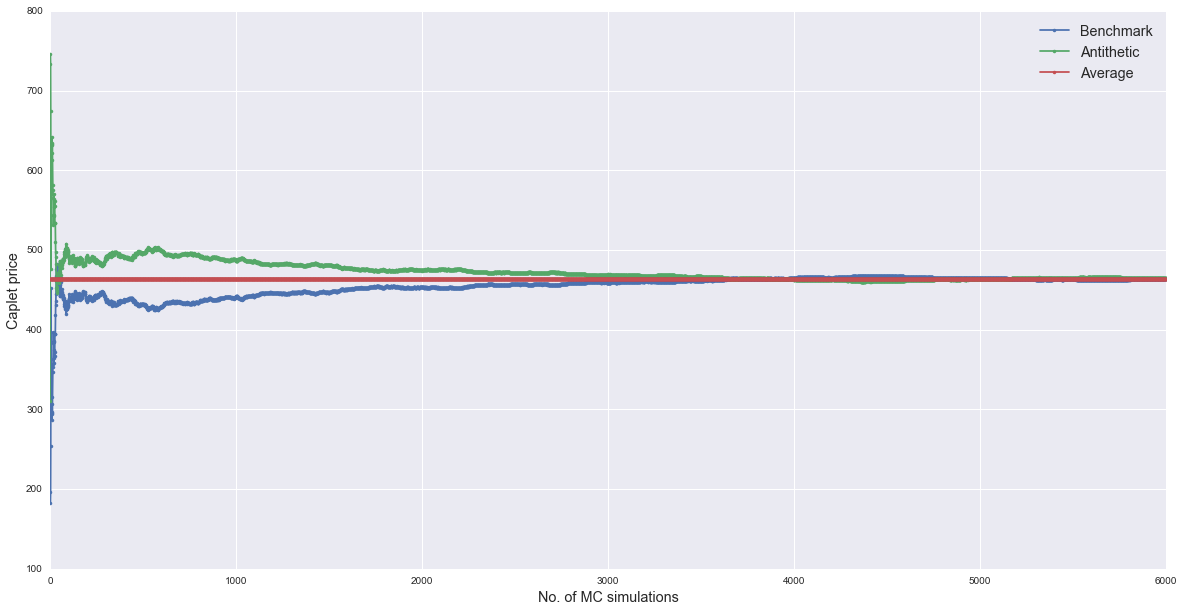

In [22]:
_ = plt.plot(np.arange(I), my_cap_plus, '.-', ms=7, label='Benchmark')
_ = plt.plot(np.arange(I), my_cap_minus, '.-', ms=7, label='Antithetic')
# plt.plot(np.arange(I), my_cap_plus, '.', ms=10, label='without Antith.', color='blue')
# plt.plot(np.arange(I), my_cap_plus, '-', ms=1, label='without Antith.', color='blue')
_ = plt.plot(np.arange(I), my_cap_join, '.-', ms=7, label='Average')
_ = plt.xlabel('No. of MC simulations', fontsize='x-large')
_ = plt.ylabel('Caplet price', fontsize='x-large')
_ = plt.legend(fontsize='x-large')


The figure shows in blue the simulated Caplet price and it's antithetic in green. The average of the two, also known as variance reduction, is shown in red. The caplet price shows robustness after around 4,000 simulations. The antithetic appears to be the mirror image - this is expected as the technique simply takes the negative of a number drawn from the standard normal distribution to boost the statistics and we know this distribution is symmetric. The variance reduction therefore has a dramatic efect even at the start of the simulation, where the fluctuations about the mean are negligible even at the start of the simulation. The convergence is shown to be in accordance to the variance-reduced curve, which means one could get a very good estimate of the price at the first simulation using this technique.